<a href="https://colab.research.google.com/github/rhshovon102/DataMining-MachineLearning/blob/main/SentimentAnalysisBasedOnTweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Dataset Link](https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset)

# **Load Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/SentimentAnalysisFromTweet/Twitter_Data.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


# **Data Preprocessing**

**Null Value Handle**

In [4]:
df.isna().sum()

clean_text    4
category      7
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
df.isna().sum()

clean_text    0
category      0
dtype: int64

In [7]:
df.category = df.category.astype(int)

In [8]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1


**Duplicate Value Handle**

In [9]:
df.drop_duplicates(inplace=True)

**Data Visualization**

In [9]:
"""import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import re
scr = re.compile('[/{}()\|@,;]')
esr = re.compile('[^0-9a-z#+_]')
sw  = set(stopwords.words('english'))

def clean(text):
  text = text.lower()
  text = scr.sub(' ',text)
  text = esr.sub(' ',text)
  text = ' '.join(word for word in text.split() if word not in sw)
  return text
df.clean_text = df.clean_text.apply(clean)"""

"import nltk\nnltk.download('stopwords')\nfrom nltk.corpus import stopwords\n\nimport re\nscr = re.compile('[/{}()\\|@,;]')\nesr = re.compile('[^0-9a-z#+_]')\nsw  = set(stopwords.words('english'))\n\ndef clean(text):\n  text = text.lower()\n  text = scr.sub(' ',text)\n  text = esr.sub(' ',text)\n  text = ' '.join(word for word in text.split() if word not in sw)\n  return text\ndf.clean_text = df.clean_text.apply(clean)"

In [10]:
x = df.clean_text
y = df.category
x[0]

'when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'

<Axes: xlabel='category', ylabel='count'>

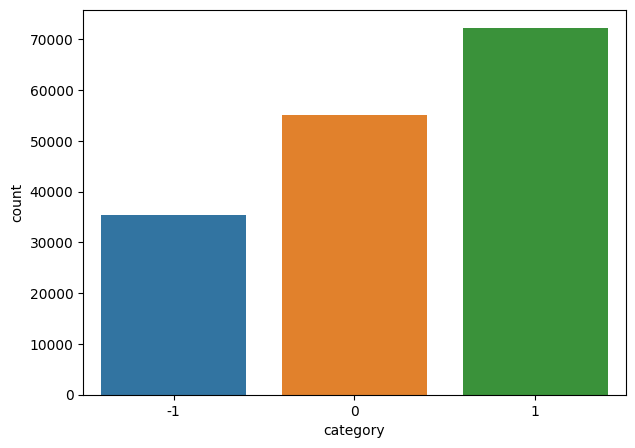

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
sns.countplot(x="category",data=df)

In [12]:
df.category.value_counts()

 1    72249
 0    55211
-1    35509
Name: category, dtype: int64

Text(0.5, 1.0, 'Distribution of sentiments')

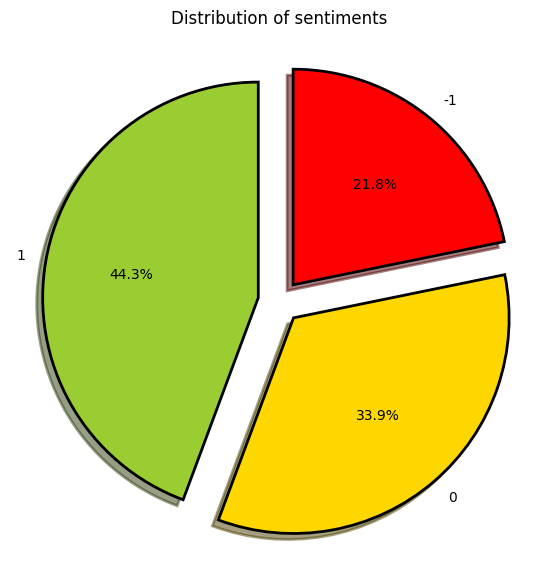

In [13]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['category'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

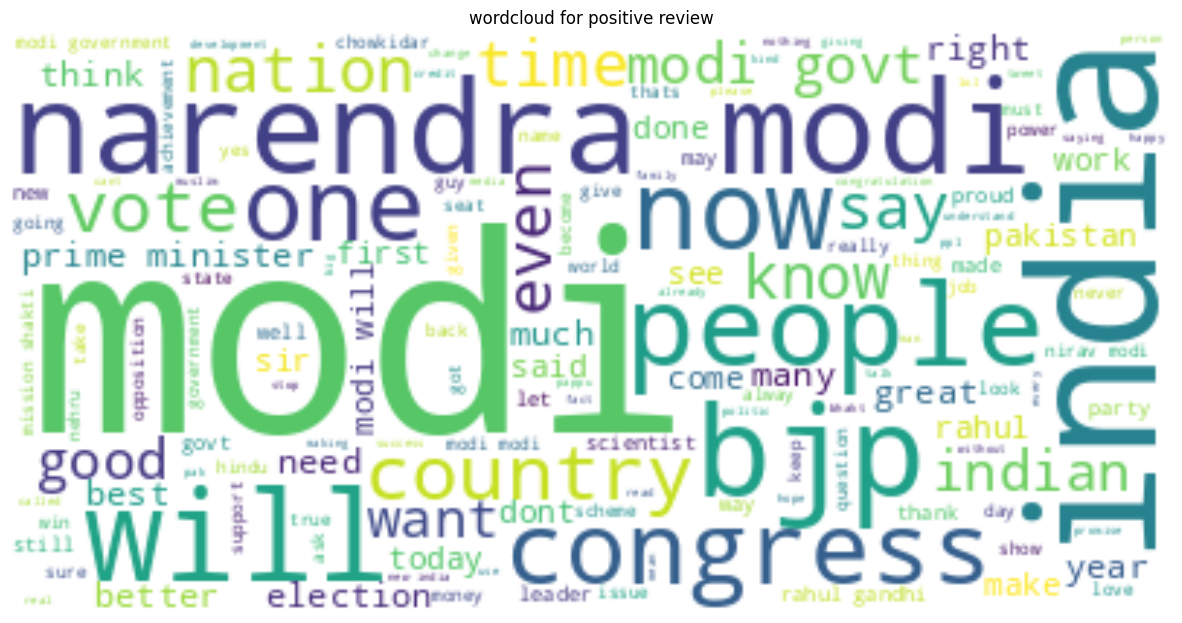

In [14]:
from wordcloud import WordCloud
text = " ".join(i for i in df[df['category']== 1]['clean_text'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_values = []

def evaluate_classifier(pipeline, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict(x_test)
    cm = confusion_matrix(y_test, predictions)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
                xticklabels=sorted(set(y_test)),
                yticklabels=sorted(set(y_test)))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    accuracy = accuracy_score(y_test, predictions)
    accuracy_values.append(accuracy)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


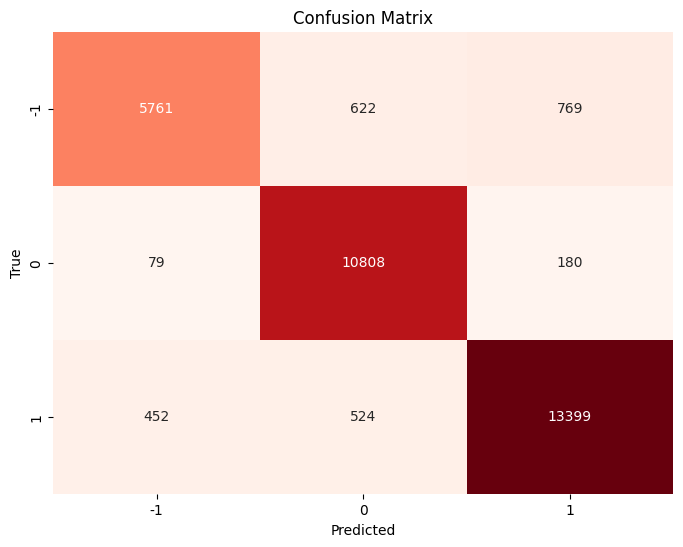

Accuracy: 0.9194
Precision: 0.9198
Recall: 0.9194
F1 Score: 0.9183


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

evaluate_classifier(lr, x, y)

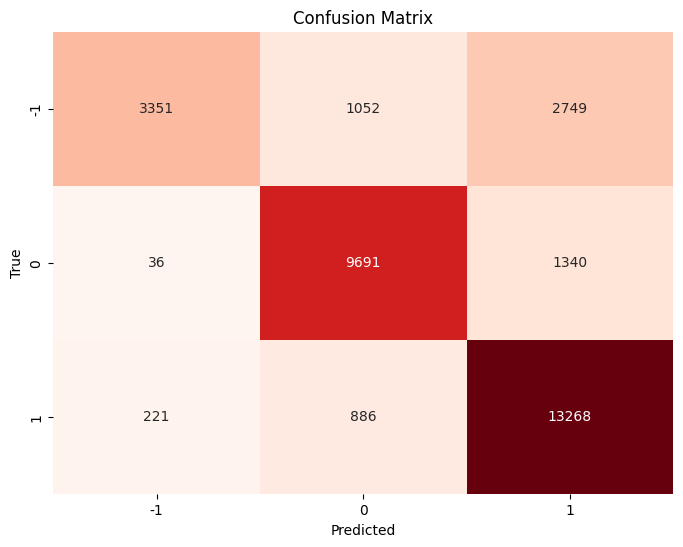

Accuracy: 0.8072
Precision: 0.8239
Recall: 0.8072
F1 Score: 0.7954


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

evaluate_classifier(rf, x, y)

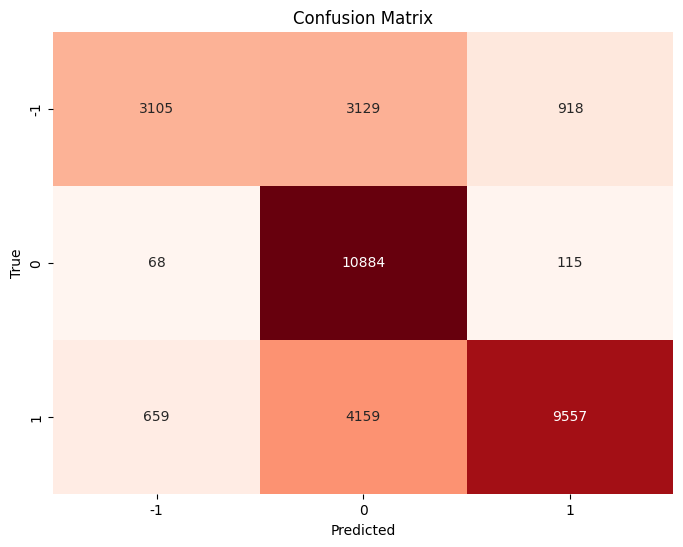

Accuracy: 0.7224
Precision: 0.7792
Recall: 0.7224
F1 Score: 0.7145


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

ab = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', AdaBoostClassifier())
])

evaluate_classifier(ab, x, y)

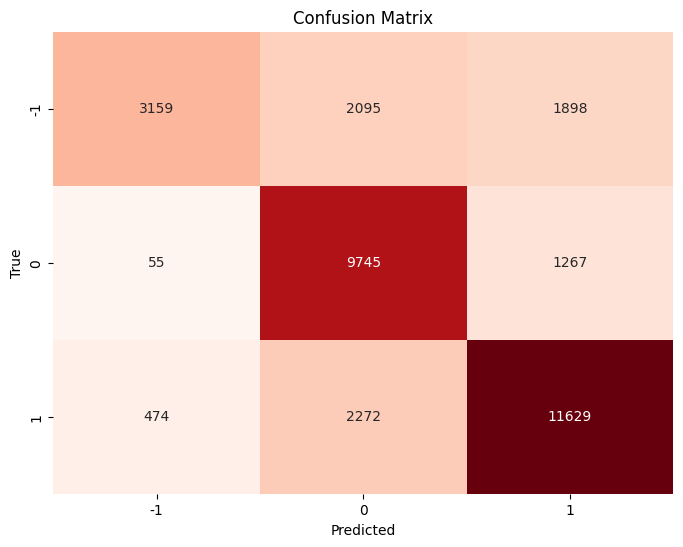

Accuracy: 0.7527
Precision: 0.7691
Recall: 0.7527
F1 Score: 0.7424


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

gb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', GradientBoostingClassifier())
])

evaluate_classifier(gb, x, y)

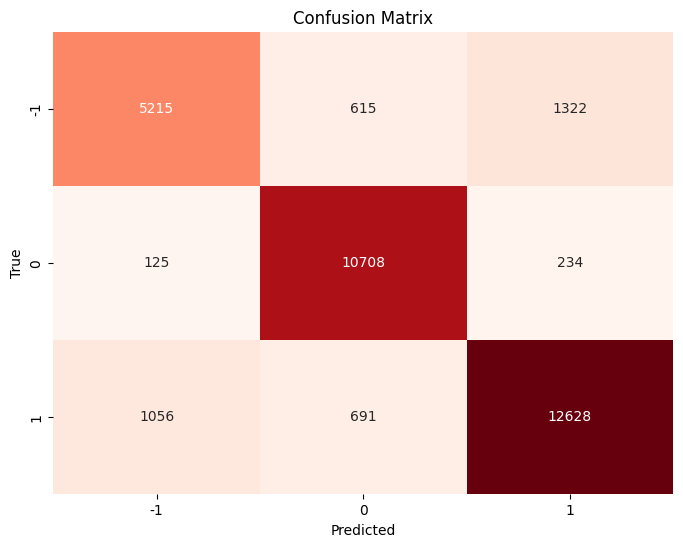

Accuracy: 0.8760
Precision: 0.8742
Recall: 0.8760
F1 Score: 0.8740


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

bc = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', BaggingClassifier())
])

evaluate_classifier(bc, x, y)

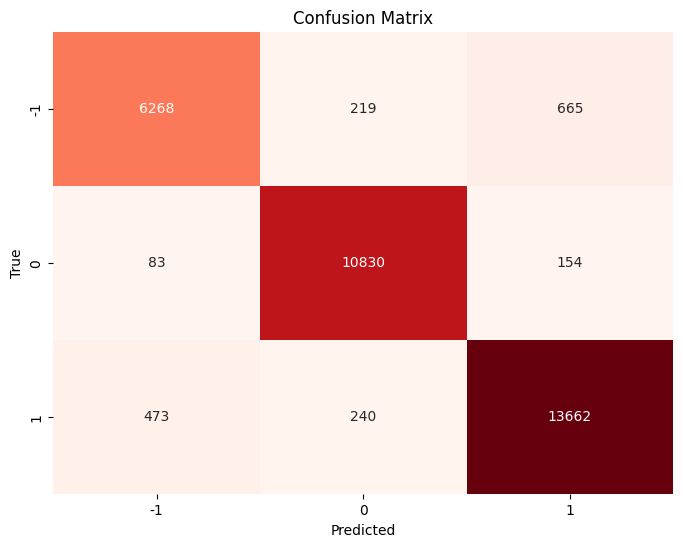

Accuracy: 0.9437
Precision: 0.9434
Recall: 0.9437
F1 Score: 0.9434


In [22]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

linear_svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='linear'))
])

evaluate_classifier(linear_svm, x, y)

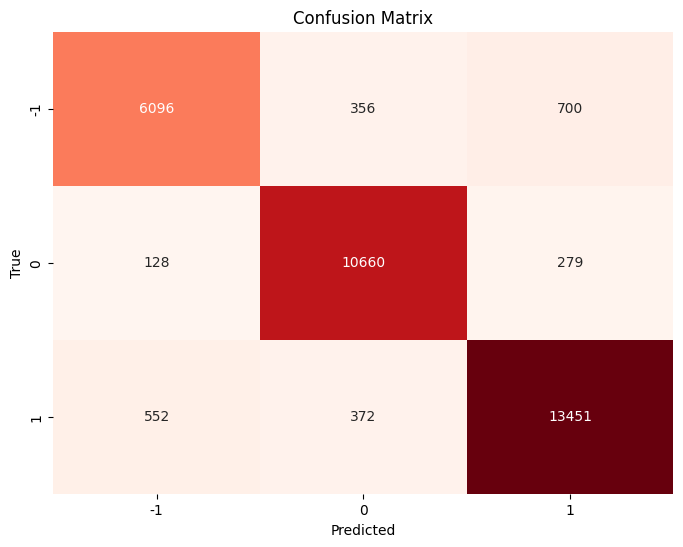

Accuracy: 0.9268
Precision: 0.9264
Recall: 0.9268
F1 Score: 0.9264


In [23]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

sigmoid_svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='sigmoid'))
])
evaluate_classifier(sigmoid_svm, x, y)

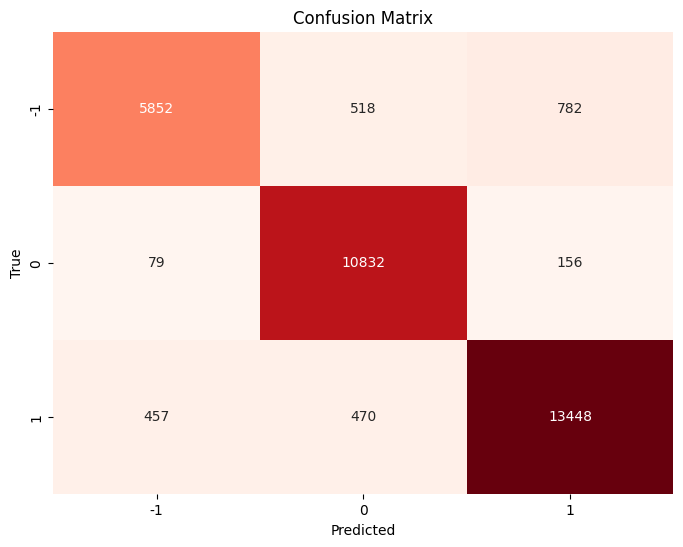

Accuracy: 0.9245
Precision: 0.9245
Recall: 0.9245
F1 Score: 0.9235


In [14]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

rbf_svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='rbf'))
])
evaluate_classifier(rbf_svm, x, y)

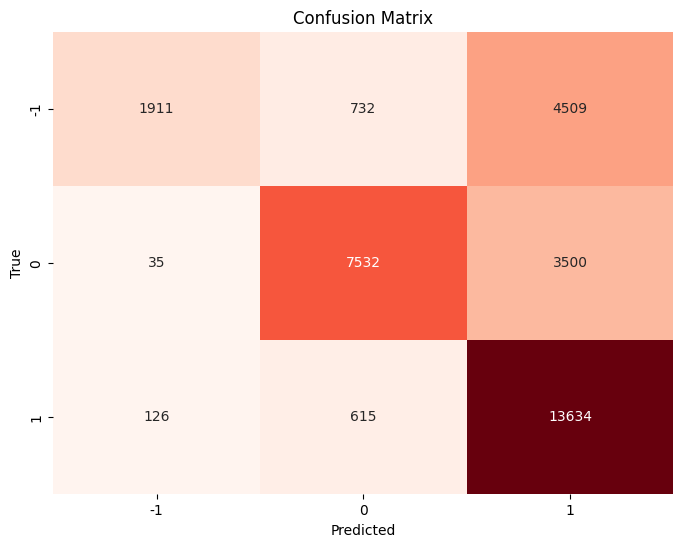

Accuracy: 0.7080
Precision: 0.7682
Recall: 0.7080
F1 Score: 0.6812


In [15]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

polynomial_svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='poly', degree=3))
])
evaluate_classifier(polynomial_svm, x, y)

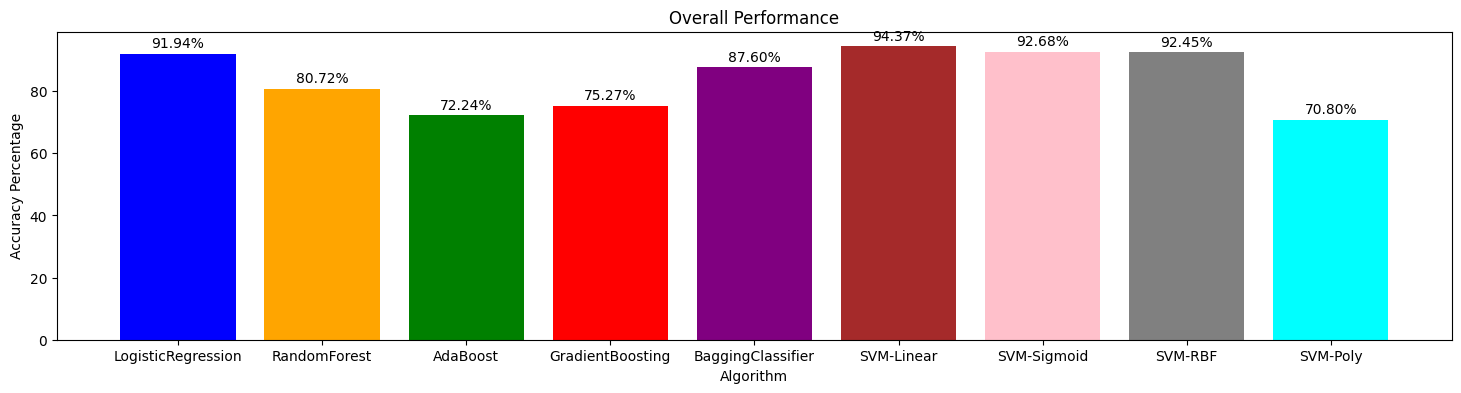

In [22]:
accuracy_values = [0.9194, 0.8072, 0.7224, 0.7527, 0.8760, 0.9437, 0.9268, 0.9245, 0.7080]
algorithm = ['LogisticRegression', 'RandomForest', 'AdaBoost', 'GradientBoosting', 'BaggingClassifier', 'SVM-Linear', 'SVM-Sigmoid', 'SVM-RBF', 'SVM-Poly']

accuracy_percentage = [accuracy * 100 for accuracy in accuracy_values]

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan']

fig, ax = plt.subplots(figsize=(18, 4))
bars = plt.bar(algorithm, accuracy_percentage, color=colors)  # Specify colors

plt.xlabel('Algorithm')
plt.ylabel('Accuracy Percentage')
plt.title('Overall Performance')

for bar, percentage in zip(bars, accuracy_percentage):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()